In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# load_data

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/except_hurt.zip'

-rw------- 1 root root 741372502 Nov  8 07:19 '/content/drive/My Drive/Colab Notebooks/datasets/except_hurt.zip'


In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets/except_hurt.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/neutrality/1f643b75974d8e74fd071cfdf8553bf651a75d5d213f46bac5550b9dde1fa6f7_┐й_20_┴▀╕│_╝ў╣┌ ╣╫ ░┼┴╓░°░г_20201209135752-010-013.jpg  
  inflating: train/neutrality/1f643b75974d8e74fd071cfdf8553bf651a75d5d213f46bac5550b9dde1fa6f7_┐й_20_┴▀╕│_╜║╞ў├ў ░№╢ў ╣╫ ╖╣└·╜├╝│_20201209135645-004-015.jpg  
  inflating: train/neutrality/1f643b75974d8e74fd071cfdf8553bf651a75d5d213f46bac5550b9dde1fa6f7_┐й_20_┴▀╕│_╟р╗ч_╗ч╣л░°░г_20201209135711-006-011.jpg  
  inflating: train/neutrality/1f643b75974d8e74fd071cfdf8553bf651a75d5d213f46bac5550b9dde1fa6f7_┐й_20_┴▀╕│_╟р╗ч_╗ч╣л░°░г_20201209135711-006-015.jpg  
  inflating: train/neutrality/1f643b75974d8e74fd071cfdf8553bf651a75d5d213f46bac5550b9dde1fa6f7_┐й_20_┴▀╕│_╟р╗ч_╗ч╣л░°░г_20201209135711-006-019.jpg  
  inflating: train/neutrality/1f643b75974d8e74fd071cfdf8553bf651a75d5d213f46bac5550b9dde1fa6f7_┐й_20_┴▀╕│_╟р╗ч_╗ч╣л░°░г_20201209135711-006-020.jpg  
  inflating: train/neutrality/1f643b75974d8e74fd071cfdf85

In [ ]:
train_dir = 'train'
valid_dir = 'validation'

# build model

In [ ]:
from tensorflow.keras.applications.xception import Xception
conv_base = Xception(include_top=False,
                     weights='imagenet',
                     input_shape=(206,278,3))

In [ ]:
conv_base.trainable=True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block14_sepconv2':
        set_trainable = True
        
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 206, 278, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 102, 138, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 102, 138, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 102, 138, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_dim=7 * 9 * 2048))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 9, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 129024)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               33030400  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 53,893,422
Trainable params: 36,195,590
Non-trainable params: 17,697,832
_________________________________________________________________


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (206,278),
    batch_size=32,
    class_mode = 'categorical')

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size = (206, 278),
    batch_size = 32,
    class_mode = 'categorical')

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=2e-5),
              metrics = ['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=188,
                    epochs=5,
                    validation_data=valid_generator,
                    validation_steps=75)

Found 6000 images belonging to 6 classes.
Found 2400 images belonging to 6 classes.
Epoch 1/5
188/188 [==============================] - 1655s 9s/step - loss: 1.6310 - acc: 0.3462 - val_loss: 1.4885 - val_acc: 0.4125
Epoch 2/5
188/188 [==============================] - 1629s 9s/step - loss: 1.4479 - acc: 0.4295 - val_loss: 1.4517 - val_acc: 0.4329
Epoch 3/5
188/188 [==============================] - 1612s 9s/step - loss: 1.3531 - acc: 0.4627 - val_loss: 1.5220 - val_acc: 0.4058
Epoch 4/5
188/188 [==============================] - 1615s 9s/step - loss: 1.2760 - acc: 0.4990 - val_loss: 1.4191 - val_acc: 0.4592
Epoch 5/5
188/188 [==============================] - 1584s 8s/step - loss: 1.2248 - acc: 0.5313 - val_loss: 1.4769 - val_acc: 0.4221


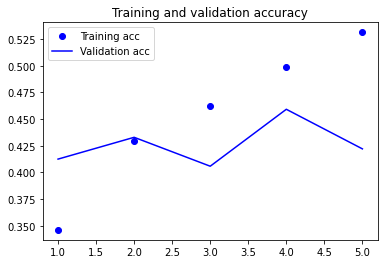

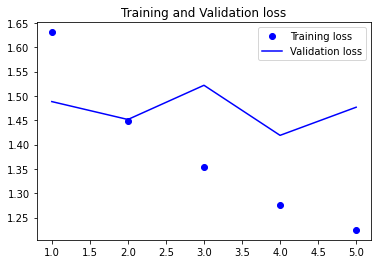

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [13]:
model.save('/content/drive/My Drive/Colab Notebooks/models/except_hurt_Xception_aug_5epochs.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
